# Deep Learning in Medicine - Spring 2019
### BMSC-GA 4493, BMIN-GA 3007 
### Homework 2



**Note:** If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex 

See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

**Submission instruction**: Upload and Submit your final jupyter notebook with necessary files in <a href='http://newclasses.nyu.edu'>newclasses.nyu.edu</a>. If you use code or script from web, please give a link to the code in your answers. Not providing the reference of the code used will reduce your points!!

**Submission deadline:** Friday March 29th 2019 (5:00 PM) --> No Extensions!!

# Question 1: Convolutional Layer  (Total 20 points)

We have a 2x6x6 image (2 channels) and three 2x3x3 convolution kernels as pictured. Bias term for each feature map is also provided. For the questions below, please provide the feature/activation maps requested, please provide the python code that you used to calculate the maps

<img src="Picture1.png" width="900">

## 1.1) 
What will be the dimension of the feature maps after we forward propogate the image using the given convolution kernels for

In [47]:
#Import common dependencies
import torch
import pandas as pd, numpy as np, matplotlib, matplotlib.pyplot as plt
from PIL import Image 
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import time
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from skimage import data, io, filters

import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable 
import time
import copy
from torch.nn import init

import torchvision
from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler

In [58]:
# >>> # With square kernels and equal stride
# >>> m = nn.Conv2d(16, 33, 3, stride=2)
# >>> # non-square kernels and unequal stride and with padding
# >>> m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
# >>> # non-square kernels and unequal stride and with padding and dilation
# >>> m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
# >>> input = torch.randn(20, 16, 50, 100)
# >>> output = m(input)
input=torch.randn(1,2,6,6)
print(input)

tensor([[[[-1.2531, -0.3941, -1.2641, -1.3288, -0.0988, -0.1382],
          [ 1.2805,  0.7334,  0.8392,  1.5003, -0.5202,  0.5756],
          [ 0.7840,  0.8432,  0.8929, -1.2703,  0.2933,  0.7815],
          [ 0.9672, -1.4211, -0.8049,  0.4005, -0.2519,  0.6135],
          [ 0.1216, -0.4899,  1.4986,  1.3020, -0.4143,  2.3063],
          [-0.3705, -1.0625, -0.8861,  0.2439, -0.2708, -1.5416]],

         [[-0.0390, -0.4183, -1.8438,  0.4854,  0.5862, -1.0793],
          [-0.4316, -0.1132,  0.9073,  0.2988, -0.3583,  0.2209],
          [ 0.5316,  0.4871, -0.4885,  0.9487, -0.0049, -1.9456],
          [-0.8705, -0.5354,  0.9950, -0.2146, -1.0156, -0.7656],
          [-1.0540,  2.8673, -0.0236, -1.1768,  1.5471, -1.0050],
          [ 0.0898,  0.6154,  0.1705,  0.2041, -0.5109,  1.9745]]]])


### 1.1.a) (1 point)
stride=1, without zero padding?

In [62]:
m = nn.Conv2d(in_channels=2,out_channels=3,kernel_size=3)
m(input).size()

torch.Size([1, 3, 4, 4])

<font color='blue'> 3x4x4 </font>

### 1.1.b) (1 point)
stride=2, without zero padding?

In [63]:
m = nn.Conv2d(in_channels=2,out_channels=3,kernel_size=3,stride=2)
m(input).size()

torch.Size([1, 3, 2, 2])

<font color='blue'> 3x2x2 </font>

### 1.1.c) (1 point) 
stride=2, with zero padding?

In [70]:
m = nn.Conv2d(in_channels=2,out_channels=3,kernel_size=3,stride=2,padding=1)
m(input).size()

torch.Size([1, 3, 3, 3])

<font color='blue'> 3x3x3 </font>

### 1.1.d) (1 point)
stride=3, with zero padding?

In [75]:
m = nn.Conv2d(in_channels=2,out_channels=3,kernel_size=3,stride=3,padding=1)
m(input).size()

torch.Size([1, 3, 2, 2])

<font color='blue'> 3x2x2</font>

### 1.1.e) (1 point) 
a dilated convolution with stride=1, dilation rate=2 and zero padding?

In [92]:
m = nn.Conv2d(in_channels=2,out_channels=3,kernel_size=3,stride=1,padding=1,dilation=2)
m(input).size()

torch.Size([1, 3, 4, 4])

<font color='blue'> 3x4x4</font>

## 1.2) (5 points)
Use the pytorch package to calculate feature/activation maps. Write a code which takes 2x6x6 image and performs a 2D convolution operation (with stride=2 and no zero padding) using 2x3x3 filters provided on the picture. After convolution layer use leaky ReLU activation function (with negative slope 0.01) and L2-pooling operation (pool width = 2 and stride = 1). Provide the code, feature maps obtained from convolution operation, activation maps, and feature maps after L2-pooling operation.

In [616]:
# starter code to load image:x, kernel weights:w and bias:b
import numpy as np
npzfile = np.load('Question1p2.npz') # 'Question1p2.npz' is provided in github repo
#print(npzfile.files) # check the variable names
x = npzfile['x']
w = npzfile['w']
b = npzfile['b']
print(x.shape) # input
print(w.shape) # weights
print(b.shape) # bias

(2, 6, 6)
(3, 2, 3, 3)
(3, 1)


In [620]:
# answer starts here

# build the model
conv = nn.Conv2d(in_channels=2,out_channels=3,kernel_size=3, stride=2) 
conv.weight = torch.nn.Parameter(torch.tensor(w,dtype=torch.double)) # weight intialization
conv.bias = torch.nn.Parameter(torch.tensor(b,dtype=torch.double).squeeze()) # bias intialization

relu = nn.LeakyReLU(negative_slope=0.01)

maxpool = nn.LPPool2d(2,kernel_size=2, stride = 1)

In [621]:
# implement the model
out1 = conv(torch.tensor([x],dtype=torch.double))
out2 = relu(out1)
out = maxpool(out2)
# print activation map
print(out1)
print(out2)
print(out)

tensor([[[[ -4., -13.],
          [ -8., -11.]],

         [[  7.,   0.],
          [  4.,  -5.]],

         [[ -1.,   3.],
          [  0.,  13.]]]], dtype=torch.float64, grad_fn=<ThnnConv2DBackward>)
tensor([[[[-4.0000e-02, -1.3000e-01],
          [-8.0000e-02, -1.1000e-01]],

         [[ 7.0000e+00,  0.0000e+00],
          [ 4.0000e+00, -5.0000e-02]],

         [[-1.0000e-02,  3.0000e+00],
          [ 0.0000e+00,  1.3000e+01]]]], dtype=torch.float64,
       grad_fn=<LeakyReluBackward0>)
tensor([[[[ 0.1924]],

         [[ 8.0624]],

         [[13.3417]]]], dtype=torch.float64, grad_fn=<PowBackward0>)


## 1.3) (10 points)
Use the pytorch package to calculate feature/activation maps of a residual unit as depicted in Figure 2 of https://arxiv.org/pdf/1512.03385.pdf as well as on the figure above.

Input --> Convolution --> Activation --> Convolution --> Addition --> Activation

Write a code which takes 2x6x6 image and performs two 2D convolution operations (stride = 1, dilation rate = 2 ) using first two 2x3x3 filters provided on the figure. After the first convolution layer and after the addition use ReLU activation function. Provide the code and feature maps obtained from each convolution operation, activation maps, and the last activation map obtained from the residual unit.

In [622]:
# build the model
conv = nn.Conv2d(in_channels=2,out_channels=2,kernel_size=3, stride=1,dilation= 2,padding=2) 
conv.weight = torch.nn.Parameter(torch.tensor(w[[0,1]],dtype=torch.double)) # weight intialization
conv.bias = torch.nn.Parameter(torch.tensor(b[[0,1]],dtype=torch.double).squeeze()) # bias intialization

relu = nn.ReLU()

maxpool = nn.MaxPool2d(kernel_size=2, stride = 1)

In [624]:
out1 = conv(torch.tensor([x],dtype=torch.double))
out1_relu = relu(out1)
out2 = conv(out1_relu)
out2_relu = relu(out2)
out = out2_relu + torch.tensor([x],dtype=torch.double)

In [457]:
print(conv(out1)) # feature map - [1st convolution layer]
print(conv(out1_relu)) # feature map - [1st avtivation layer]

print(conv(out2)) # feature map - [2st convolution layer]
print(conv(out2_relu)) # feature map - [2st avtivation layer]

print(out) # feature map - [addition layer]

tensor([[[[-13., -32.,  25.,  -5.,  24.,  55.],
          [-24.,  47.,   0.,   1.,  16., -24.],
          [ 25.,  56.,  35.,  83., -11., -62.],
          [ 32., -18.,  33.,   2., -15.,  44.],
          [ -6., -25.,  -2., -17.,  -1.,  41.],
          [-11., -12., -39.,   7.,  40., -22.]],

         [[ 10.,  10.,  12.,  42.,  20.,  37.],
          [ 12.,  23.,  -3.,  -8.,  -4.,   9.],
          [  3.,  60., -12., -31.,  10., -11.],
          [ 22., -31., -48.,  41.,  19.,  10.],
          [-21., -46., -11.,  -5.,  30.,  25.],
          [-60.,  37.,  31., -16.,  12.,  18.]]]], dtype=torch.float64,
       grad_fn=<ThnnConvDilated2DBackward>)
tensor([[[[  1.,   1.,  13.,  -3.,   1.,   1.],
          [-24.,  15.,  -7.,  -4.,   5., -12.],
          [  5.,   5.,  -6.,  28.,  -9., -24.],
          [ 22., -13.,  17., -19., -25.,  16.],
          [ -9., -29.,  -6., -21.,  -9.,  21.],
          [-18., -18., -28.,   1.,  27., -10.]],

         [[  0.,   0.,  -4.,  -5.,   0.,   0.],
          [ -8.,

# Question 2: Network design parameters for disease classification (Total 15 points)

Disease classification is a common problem in medicine. There are many ways to solve this problem. Goal of this question is to make sure that you have a clear picture in your mind about possible techniques that you can use in such a classification task.

Assume that we have a 10K brain images in a dataset of magnetic resonance images (MRIs). For each image, the dimension is 64x64x64 and we have the label for each image. The label of each image defines which class the image belongs (lets assume we have 3 different disease classes in total). You will describe your approach of classifying the disease for the techniques below. Make sure you do not forget the bias term. You can either design your proposed network by explaining it explicitely or you can provide the pytorch code which designs the network for questions 2.1.a, 2.2.a, and 2.3.a


In [661]:
# starter code
# you can generate a random image tensor for batch_size 8
x = torch.Tensor(8,1,64,64,64).normal_().type(torch.FloatTensor)
x.shape

torch.Size([8, 1, 64, 64, 64])

### 2.1.a) (2 points)
Design a multi layer perceptron (MLP) with a single hidden layer which takes an image as input (by reshaping it to a vector: lets call this a vectorized image) and first maps the vectorized images to a vector of 128 then feeds this vector to a fully connected layer to get the probability of 3 tissue classes. 

In [765]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.fc1 = nn.Linear(64*64*64, 128) # first layer: vecterized input (64^3) --> 128 
        self.fc2 = nn.Linear(128, 3)         # output: vector of 3 (probability of three classes)
        
        
    def forward(self, x):
        x = x.view(x.size(0), -1) # convert tensor (8, 1, 64,64,64) --> (8, 64^3)
        x = self.fc1(x)
        x = nn.ReLU(x)
        x = self.fc2(x)
        
        return x

model = MLP()    

### 2.1.b) (2 points)
Clearly mention the sizes for your input and output at each layer until you get final output vector with 3 tissue classes in 64x64x64 voxels

In [767]:
print(model)
print("\nAnswer: input  [64 x 64 x64] --> flatten --> [262144] --> hidden layer --> [128] --> output --> 3")

MLP(
  (fc1): Linear(in_features=262144, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

Answer: input  [64 x 64 x64] --> flatten --> [262144] --> hidden layer --> [128] --> output --> 3


### 2.1.c) (1 points)
How many parameters you need to fit for your design? How does adding another hidden layer effected the number of parameters to use?

In [769]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            #print(s)
            nn = nn*s
        pp += nn
    return pp

print('We need this many parameters to fit: ', get_n_params(model))

We need this many parameters to fit:  33554947


### 2.2.a) (2 points)
Design a one layer convolutional neural network which first maps the images to a vector of 128 (with the help of convolution and pooling operations) then feeds this vector to a fully connected layer to get the probability of 3 disease classes.

In [840]:
# this is just a pilot test for correct conv/maxpooling layer structure

x = torch.Tensor(8,1,64,64,64).normal_().type(torch.FloatTensor)

m1 = nn.Conv3d(in_channels=1,out_channels=128,kernel_size=3,stride=2)
m2 = nn.MaxPool3d(kernel_size=3,stride=2)


print( 'input: ' + str(list(x.size())))
x = m1(x)
print( 'conv layer: ' + str(list(x.size())))
x = m2(x)
print( 'maxpooling layer: ' + str(list(x.size())))
x = x.view(x.size(0), -1)
print( 'vectorlized: ' + str(list(x.size())))

input: [8, 1, 64, 64, 64]
conv layer: [8, 128, 29, 29, 29]
maxpooling layer: [8, 128, 12, 12, 12]
vectorlized: [8, 221184]


In [830]:
# Answer
class conv1(nn.Module):
    def __init__(self):
        super(conv1, self).__init__()
        self.conv1 = nn.Conv3d(in_channels=1,out_channels=128,kernel_size=3,stride=2,padding=1)
        self.pool1 = nn.MaxPool3d(kernel_size=3,stride=2)
        self.fc1 = nn.Linear(432000, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.fc1(x)
        return x  

### 2.2.b) (2 points)
Clearly mention the sizes for your input, kernel, pooling, and output at each step until you get final output vector with 3 probabilities

In [837]:
model = conv1()
print(model)
print("\nAnswer: input  [1 x 64 x 64 x 64] --> Conv --> [128 x 31 x 31 x 31] --> MaxPool --> [128 x 15 x 15 x 15] --> vectorize [432000] -->output --> [3]")

conv1(
  (conv1): Conv3d(1, 128, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
  (pool1): MaxPool3d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=432000, out_features=10, bias=True)
)

Answer: input  [1 x 64 x 64 x 64] --> Conv --> [128 x 31 x 31 x 31] --> MaxPool --> [128 x 15 x 15 x 15] --> vectorize [432000] -->output --> [3]


### 2.2.c) (1 points) 
How many parameters you need to fit for your design?

In [67]:
print('We need this many parameters to fit: ', get_n_params(model))

We need this many parameters to fit:  4323594


### 2.2.d) (2 points)
Now increase your selected convolution kernel size by 4 in each direction. Describe the effect of using small vs large filter size during convolution. 

In [68]:
# this is just a pilot test for correct conv/maxpooling layer structure

x = torch.Tensor(8,1,64,64,64).normal_().type(torch.FloatTensor)

m1 = nn.Conv3d(in_channels=1,out_channels=128,kernel_size=7,stride=2)
m2 = nn.MaxPool3d(kernel_size=7,stride=2)


print( 'input: ' + str(list(x.size())))
x = m1(x)
print( 'conv layer: ' + str(list(x.size())))
x = m2(x)
print( 'maxpooling layer: ' + str(list(x.size())))
x = x.view(x.size(0), -1)
print( 'vectorlized: ' + str(list(x.size())))

input: [8, 1, 64, 64, 64]
conv layer: [8, 128, 29, 29, 29]
maxpooling layer: [8, 128, 12, 12, 12]
vectorlized: [8, 221184]


In [69]:
# Answer
class conv1(nn.Module):
    def __init__(self):
        super(conv1, self).__init__()
        self.conv1 = nn.Conv3d(in_channels=1,out_channels=128,kernel_size=3,stride=2,padding=1)
        self.pool1 = nn.MaxPool3d(kernel_size=3,stride=2)
        self.fc1 = nn.Linear(221184, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.fc1(x)
        return x

<font color='blue'>
After increasing the kernal size

1. each unit contains more information, in other words, information are more compressed.

2. the sizes of the output from both convolutional layer and maxpooling layer are decreased 

3. the fully connected layer for last step also has a less number of weight parameters
     </font >

## 2.3) (3 points)
Explain your findings regading different types of neural networks and building blocks based on your observations from 2.1 and 2.2. 

<font color='blue'>

In the case of 2.1 and 2.2, I used a *MLP* and a *convolutiaonl* network, respectively.

<font color='red'> 
In terms of **preserving the spatial information**:
    
* 2.1 flatten and vectorized the input, unable to preserve the spatial information underying; in comparison, 
* 2.2 uses filters that are designed for its 3D structure, are able to consider the spatial information within the input and also conve
 </font >
 
<font color='green'> 
In terms of **number of parameters**, 
* 2.1 needs 33554947 parametrs as weights connect input to perceptrons
* 2.2 needs 4323594 parametrs, which takes less computation to optimize with backpropagation
* 2.1 with significant more parameters will be more difficult to train, requring more computational power and less possible to generate a converged model compared to 2.2
</font >

 </font >

# Question 3: Literature Review: ChestX-ray8 (Total 15 points + 3 points for Bonus question)
Read this paper:

Wang X, Peng T, Lu L, et al. 
ChestX-Ray8: Hospital-Scale Chest X-Ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases. CVPR. 2017. https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8099852


We are interested in understanding the task, the methods that is proposed in this publication, technical aspects of the implementation, and possible future work. After you read the full article answer the following questions. Describe you answers in your own words.  

## 3.1) (3 points) 
What type of learning algorithm is used (supervised, semi-supervised or unsupervised) for the classification and localization tasks? What is the reason for selecting this type of learning algorithm? 

<font color="blue">

    
**Supervised for multi-label image classification.**

**Weakly(semi)-Supervised for localization.**  The pathological sites on the images are presented in varying sizes, shapes etc.. Strigent Supervised algorithm could failed to appreciate such variation. Thus Weakly-Supervised algorithem are exploited to adress the *heterogenity*.
</font>


## 3.2) (5 points)
What type of convolutional neural network architectures were used in the paper? How does transfer learning from these architectures achieved?

<font color="blue">

**Deep Convolutional Neural Network** 

The authors adopted pretrained models (*AlexNet* , *GoogLeNet*, *VGGNet-16* and *ResNet-50*) by taking the partial architecture, which keeps the convolutional layers but leaves out the fully-connected layers and the final classification layers. 

Instead they designed a transition layer, followed by a global pooling layer, a prediction layer and a loss layer in the end.
      
</font>

## 3.3) (2 points)
What is the loss function? 

<font color='blue'>

They used a **weighted Cross Entropy loss (W-CEL)** that integrated two balancing factors  $ β_P = \frac{|P|+ |N|}{|P|} , β_N =\frac{|P|+ |N|}{|N|} $ to cope with the the over-representation of negative samples.

Detailed calculation:
$$L_{W–CEL} =  β_P \sum_{y_c=1}^{} -ln(f(x)) + β_N \sum_{y_c=0}^{} -ln(1-f(x))$$

</font>

## 3.4) (5 points)

What are the evaluation metrics used for model comparison in classification and localization task? Explain why those metrics were chosen?

<font color="blue">
    
Classification: 
- **AUC** was used to compare the **Accuracy** and **Specificity** of different models.

Accuracy of Localization:  
- the standard Intersection over Union ratio ($IoU$), or the Intersection over the detected B-Box area ratio (IoBB) care calculated.
- A correct localization by requiring either $IoU > T(IoU)$ or $IoBB > T(IoBB)$.

    
 </font>

## 3.5) Bonus (3 points)
Why did the authors perform text mining?

<font color="blue">
    
The authors want to achive classification of image into 8 disease types. To train a model that is capable of this task, they need to have a *ground truth* of what disease to be compared with. However, these type of *ground truth* is not available in ready format, so authors need to speculate from the report to get clue.
    
Text mining is the their approach to translate a long report into a single label as health or disease; if disease, which type. 
    
In this way, the authors will have labels that the model can compare their output with and achive model optimization.
    
</font>
    

# Question 4: Deep CNN design for disease classification (Total 30 points)

In this part of the howework, we will focus on classifiying the lung disease using chest x-ray dataset provided by NIH (https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community). You should be familiar with the dataset after answering Question 3.

You need to use HPC for training part of this question, as your computer's CPU will not be fast enough to compute learning iterations. In case you use HPC, please have your code/scripts uploaded under the questions and provide the required plots and tables there as well. Data is available in HPC under /beegfs/ga4493/data/HW2 folder. We are interested in distinguishing between only pneumothorax and only cardiomegaly cases. By saying so we have 2 classes that we want to identify by modelling a deep CNN.

First, you need to work on Data_Entry_2017.csv file to identify cases/images that has only pneumothorax and only cardiomegaly. This file can be downloaded from https://nihcc.app.box.com/v/ChestXray-NIHCC

## 4.1) Train, Test, and Validation Sets (2 points)
Write a script to read data from Data_Entry_2017.csv and process to obtain 3 sets (train, validation and test). By using 'Finding Labels' column, define a class that each image belongs to, in total you can define 2 classes:
- 0 cardiomegaly
- 1 pneumothorax

Generate a train, validation and test set by splitting the whole dataset containing specific classes (0, and 1)  by 70%, 10% and 20%, respectively. Test set will not be used during modelling but it will be used to test your model's accuracy. Make sure you have similar percentages of different cases in each subset. Provide statistics of the number of classess in your subsets. (you do not need to think about splitting the sets based on subjects for this homework. In general, we do not want images from the same subject to appear in both train and test sets!!) 

Write a .csv files defining the samples in your train, validation and test set with names: train.csv, validation.csv, and test.csv. Submit these files with your homework. 

In [530]:
#  import the csv file
label_df = pd.read_csv('Data_Entry_2017.csv')
x=label_df.iloc[:, 1].unique()

#  select the rows with keywords
temp = label_df.loc[['Pneumothorax' in i or 'Cardiomegaly' in i for i in label_df.iloc[:, 1]]]

#  update the class into 0 or 1
temp = temp.replace(regex={'.*Pneumothorax.*':1, '.*Cardiomegaly.*':0})
temp.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,0,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,0,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,0,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
23,00000008_000.png,0,0,8,69,F,PA,2048,2500,0.171,0.171,NaN
39,00000013_001.png,1,1,13,60,M,AP,3056,2544,0.139,0.139,NaN


In [70]:
#  split training, testing, validation data

# first split training+test:validation=8:2, stritified on the disease type
data_model, data_validation = train_test_split(temp, test_size=0.2, random_state=42,stratify=temp["Finding Labels"])

# then split training:testing=7:1, stritified on the disease type 
data_train, data_test= train_test_split(data_model, test_size=1/8, random_state=42,stratify=data_model["Finding Labels"])

print(len(data_train));print(len(data_test));print(len(data_validation))

5620
803
1606


In [71]:
data_train.to_csv("train.csv")
data_test.to_csv("test.csv")
data_validation.to_csv("validation.csv")

## 4.2) Data preparation before training
From here on, you will use HW2_trainSet.csv, HW2_testSet.csv and HW2_validationSet.csv provided under github repo for defining train, test and validation set samples instead of the csv files you generate on Question 4.1.


There are multiple ways of using images as an input during training or validation. Here, you will use torch Dataset class  (http://pytorch.org/tutorials/beginner/data_loading_tutorial.html). We provided the dataloader code below. Please explain what does following lines of code achieves in the data loader and propose alternatives.

### 4.2.a) (2 points) 

image = io.imread(img_name,as_gray=True)

<font color="blue">
    
Load an image from file and with `as_gray=True` converts color images to gray-scale (64-bit floats). 
             
</font>

### 4.2.b) (2 points) 

image = (image - image.mean()) / image.std()

<font color="blue">
    
Normalize the images pixel values by taking its Z score value
             
</font>

## 4.3) CNN model definition (6 points)
Since now we can import images for model training, next step is to define a CNN model that you will use to train disease classification task. Any model requires us to select model parameters like how many layers, what is the kernel size, how many feature maps and so on. The number of possible models is infinite, but we need to make some design choices to start.  Lets design a CNN model with 2 convolutional layers, 2 residual units (similar to Figure 2 of https://arxiv.org/pdf/1512.03385.pdf) and a fully connected layer followed by a classification layer. Lets use 

-  3x3 convolution kernels (stride 1 in resnet units and stride 2 in convolutional layers)
-  ReLU for an activation function
-  max pooling with kernel 2x2 and stride 2 only after the convolutional layers. 

Define the number of feature maps in hidden layers as: 16, 16, 16, 32, 32, 32, 64 (1st layer, ..., 7th layer). 

Input --> Convolution1 --> ResNetBlock1 --> Convolution2 --> ResNetBlock2 --> FC --> Output


Write a class which specifies this network details. 

In [137]:

def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)



class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes, stride)
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.relu(out)
        out = self.conv2(out)
        
        out += identity
        out = self.relu(out)

        return out


class ResNet_HW2(nn.Module):

    def __init__(self, num_classes=2):
        super(ResNet_HW2, self).__init__()
        self.inplanes = 64
        self.conv1 = conv3x3(1,16,stride=2)
        self.conv2 = conv3x3(16,32,stride=2)
        self.layer1 = BasicBlock(16, 16, stride=1, downsample=None, norm_layer=None)
        self.layer2 = BasicBlock(32, 32, stride=1, downsample=None, norm_layer=None)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(131072 , 64)
        self.classify = nn.Linear(64, num_classes)


    def forward(self, x):

        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer2(x)
        
        x = x.view(x.size(0), -1)
        #print x.size()
        x = self.fc(x)
        
        x = self.classify(x)
        
        return x
   
   
   
def resnet(pretrained=False, **kwargs):
    """Constructs a ResNet model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet_HW2(**kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet32']))
    return model

## 4.4) (2 points)
How many learnable parameters of this model has? How many learnable parameters we would have if we replace the fully connected layer with global average pooling layer (Take a look at Section 3.2 of https://arxiv.org/pdf/1312.4400.pdf)?  

In [849]:
model = resnet()

In [855]:
print("the number of parameters in this model is" , get_n_params(model))

the number of parameters in this model is 8416594


## 4.5) Loss function and optimizer (2 points)
Define a loss criterion and an optimizer using pytorch. What type of loss function is applicable to our binary classification problem? Explain your choice of a loss function.  For an optimizer lets use SGD with momentum for now. Choose an emprical learning rate and momentum.  

<font color="blue">
The cross entropy loss function and negative log likelihood loss both applicable to binary classification problem
I choose to use CrossEntropy loss function
    
 </font>
 
 <font color="red">
    why??
</font>

In [856]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.02)
criterion = nn.CrossEntropyLoss()

_Some background:_ In network architecture design, we want to have an architecture that has enough capacity to learn. We can achive this by using large number of feature maps and/or many more connections and activation nodes. However, having a large number of learnable parameters can easily result in overfitting. To mitigate overfitting, we can keep the number of learnable parameters of the network small either using shallow networks or few feature maps. This approach results in underfitting that model can neither model the training data nor generalize to new data. Ideally, we want to select a model at the sweet spot between underfitting and overfitting. It is hard to find the exact sweet spot. 

We first need to make sure we have enough capacity to learn, without a capacity we will underfit. Here, you will need to check if designed model in 4.3. can learn or not. Since we do not need to check the generalization capacity (overfitting is OK for now since it shows learning is possible), it is a great strategy to use a subset of training samples. Also, using a subset of samples is helpful for debugging!!!

## 4.6) Train the network on a subset (8 points)
Lets use a script to take random samples from train set (HW2_trainSet.csv), lets name this set as HW2_randomTrainSet. Choose random samples from validation set (HW2_validationSet.csv), lets name this set as HW2_randomValidationSet. You used downsampling of images from 1024x1024 size to 64x64 in the Lab 4. This was fine for learning purpose but it will significantly reduce the infomation content of the images which is important especially in medicine. In this Howmework you MUST use original images of size 1024x1024 as the network input. 

In [217]:
# get samples from HW2_trainSet.csv
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('HW2_trainSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomTrainSet.csv',index=False)

df = pd.read_csv('HW2_validationSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomValidationSet.csv',index=False)

Selected subset class frequencies
 1    158
0     72
Name: Class, dtype: int64
Selected subset class frequencies
 1    20
0    13
Name: Class, dtype: int64


Use the random samples generated and write a script to train your network. Using the script train your network using your choice of weight initialization strategy. In case you need to define other hyperparameters choose them emprically, for example batch size. Plot average loss on your random sample set per epoch. (Stop the training after at most ~100 epochs) 

<font color="red">
The model has been trained on Prince. 

Loss and accuracy for traning and validation is saved in csv files *4.6_acc2plot.csv*, *4.6_loss2plot.csv* and plotted below

</font>

In [ ]:
dataset_sizes = {'train': len(chestXray_TrainData), 'val': len(chestXray_ValidationData)}

def init_weights(module):

    #Optional: Initialize weights using Xavier Initialization 
    
    for name, param in module.named_parameters():
        if name.find('weight') != -1:
            if len(param.size()) == 1:
                init.uniform(param.data, 1)
            else:
                init.xavier_uniform(param.data)
        elif name.find('bias') != -1:
            init.constant(param.data, 0)

# use GPU if availaible       
use_gpu= torch.cuda.is_available() 

# model selection
model = ResNet_HW2()
init_weights(model)    
if use_gpu:
    model.cuda()
      
# loss function and optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.2)
criterion = nn.CrossEntropyLoss() 
       
      



# ----------------------------------------------
# 3. train model
# ----------------------------------------------
def train_model(model, criterion, optimizer, num_epochs=25, trainVal=['train','val'],verbose=True):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    loss2plot = np.zeros([2,num_epochs])
    acc2plot  = np.zeros([2,num_epochs])

    for epoch in range(num_epochs):
        if verbose:
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in trainVal:
            if phase == 'train':
                imageLoader = train_loader
            else:
                imageLoader = validation_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for sample_batched in imageLoader:
                # get the inputs
                inputs = sample_batched['x']
                labels = sample_batched['y']

                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs).type(torch.FloatTensor).cuda()
                    labels = Variable(labels).type(torch.LongTensor).cuda()
                else:
                    inputs, labels = Variable(inputs).type(torch.FloatTensor), Variable(labels).type(torch.LongTensor)
            

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)
                

 
                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
 
                #  statistics
                running_loss += loss.data.item() * inputs.size(0)
                running_corrects += float(torch.sum(preds == labels.data))


 
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            


            if phase == 'train':
                loss2plot[0,epoch] = epoch_loss
                acc2plot[0,epoch] = epoch_acc
            else:
                loss2plot[1,epoch] = epoch_loss
                acc2plot[1,epoch] = epoch_acc


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

            if verbose:
                print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                    phase, epoch_loss, epoch_acc))


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    np.savetxt("4.6_loss2plot_lr0.01.csv",loss2plot,delimiter=",")
    np.savetxt("4.6_acc2plot_lr0.01.csv",acc2plot,delimiter=",")
    
    return model



model_ft = train_model(model, criterion, optimizer,num_epochs=25, trainVal=['train','val'])


# ----------------------------------------------


# for sample_batched in train_loader:
# 	inputs = sample_batched['x']
# 	labels = sample_batched['y']
# 	
# 
# if use_gpu:
# 	inputs = Variable(inputs).type(torch.FloatTensor).cuda()
# 	labels = Variable(labels).type(torch.LongTensor).cuda()
# else:
# 	inputs, labels = Variable(inputs).type(torch.FloatTensor), Variable(labels).type(torch.LongTensor)
# 
# outputs = model(inputs)
# loss = criterion(outputs, labels)
# _, preds = torch.max(outputs.data, 1)
# 
# running_loss = 0.0
# running_corrects = 0
# running_corrects += float(torch.sum(preds == labels.data))
# print(running_corrects / 16)



In [72]:
def plot_loss_acc(loss_file,acc_file, trainVal = ['train','val']):
    
    loss2plot = pd.read_csv(loss_file, sep=',',header=None).values
    acc2plot = pd.read_csv(acc_file, sep=',',header=None).values
    
    for phase in trainVal:
        if phase == 'train':
            idx=0
        else:
            idx=1
            
        fig = plt.figure()
        
    
        a = fig.add_subplot(2,2,2*idx+1)
        plt.plot(loss2plot[idx,:])
        plt.title('Loss per epoch for ' + phase)
        #plt.suptitle('Curves for ' + phase)

        a = fig.add_subplot(2,2,2*idx+2)
        plt.plot(acc2plot[idx,:])
        plt.title('Accuracy per epoch for ' + phase)
        plt.show()

#         plt.plot(loss2plot[idx,:]);plt.title('Loss per epoch for ' + phase); plt.show()
#         plt.plot(acc2plot[idx,:]);plt.title('Accuracy per epoch for ' + phase); plt.show()

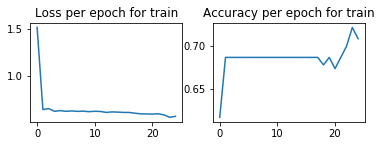

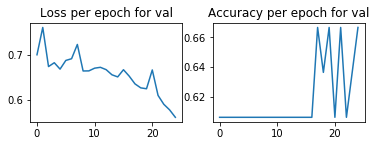

In [887]:
plot_loss_acc(loss_file="MLresults/4.6_loss2plot_lr0.01.csv",acc_file="MLresults/4.6_acc2plot_lr0.01.csv")

## 4.7) Analysis of training using a CNN model(2 points)
Describe your findings. Can your network learn from 230 random samples? Does CNN model have enough capacity to learn with your choice of emprical hyperparameters?
-  If yes, how will average loss plot will change if you multiply the learning rate by 10?
-  If no, how can you increase the model capacity? Increase your model capacity and train again until you find a model with enough capacity. If the capacity increase is not sufficient to learn, think about emprical parameters you choose in designing your network and make some changes on your selection. Describe what type of changes you made to your original network and how can you manage this model to learn.

<font color="blue">

Yes, my model was able to learn by decreased loss and increased accuracy overall.

However, it seems my model is overfitting by very unstable accuracy at Epoch 15-25.

Then I increased my learning rate by 10 from  `lr=0.01` to `lr =0.1`, the results are shown below.

At epoch #3-4, my models stopped updating with fixed loss and accuracy. I think it is because that my model is stuck in a local minima or a highly fluctrating region where the parmeters need to micro-updated to overcome the local minima. 

</font>

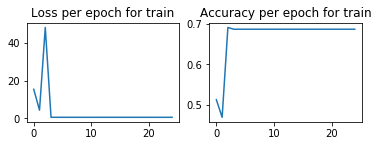

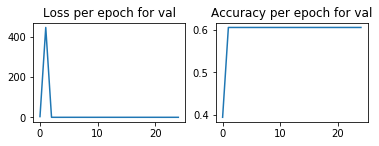

In [77]:
plot_loss_acc(acc_file='MLresults/old/4.6_acc2plot_lr0.1.csv',loss_file='MLresults/old/4.6_loss2plot_lr0.1.csv')

## 4.8) Train the network on the whole dataset (4 points)
After question 4.7., you should have a network which has enough capacity to learn and you were able to debug your training code so that it is now ready to be trained on the whole dataset. Train your network on the whole train set (HW2_trainSet.csv) and check the validation loss on the whole validation set (HW2_validationSet.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

In [ ]:
# ----------------------------------------------
# 3. Select model and initialize
# ----------------------------------------------
dataset_sizes = {'train': len(chestXray_TrainData), 'val': len(chestXray_ValidationData)}

def init_weights(module):

    #Optional: Initialize weights using Xavier Initialization 
    
    for name, param in module.named_parameters():
        if name.find('weight') != -1:
            if len(param.size()) == 1:
                init.uniform(param.data, 1)
            else:
                init.xavier_uniform(param.data)
        elif name.find('bias') != -1:
            init.constant(param.data, 0)

# use GPU if availaible       
use_gpu= torch.cuda.is_available() 

# model selection
model = ResNet_HW2()
init_weights(model)    
if use_gpu:
    model.cuda()
      
# loss function and optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.2)
criterion = nn.CrossEntropyLoss() 
       
      



# ----------------------------------------------
# 3. train model
# ----------------------------------------------
def train_model(model, criterion, optimizer, num_epochs=25, trainVal=['train','val'],verbose=True):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    loss2plot = np.zeros([2,num_epochs])
    acc2plot  = np.zeros([2,num_epochs])

    for epoch in range(num_epochs):
        if verbose:
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in trainVal:
            if phase == 'train':
                imageLoader = train_loader
            else:
                imageLoader = validation_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for sample_batched in imageLoader:
                # get the inputs
                inputs = sample_batched['x']
                labels = sample_batched['y']

                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs).type(torch.FloatTensor).cuda()
                    labels = Variable(labels).type(torch.LongTensor).cuda()
                else:
                    inputs, labels = Variable(inputs).type(torch.FloatTensor), Variable(labels).type(torch.LongTensor)
            

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)
                

 
                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
 
                #  statistics
                running_loss += loss.data.item() * inputs.size(0)
                running_corrects += float(torch.sum(preds == labels.data))


 
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            


            if phase == 'train':
                loss2plot[0,epoch] = epoch_loss
                acc2plot[0,epoch] = epoch_acc
            else:
                loss2plot[1,epoch] = epoch_loss
                acc2plot[1,epoch] = epoch_acc


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

            if verbose:
                print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                    phase, epoch_loss, epoch_acc))


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    np.savetxt("4.8_loss2plot.csv",loss2plot,delimiter=",")
    np.savetxt("4.8_acc2plot.csv",acc2plot,delimiter=",")
    
    return model



# model_ft = train_model(model, criterion, optimizer,num_epochs=25, trainVal=['train','val'])


# torch.save(model_ft.state_dict(), "model_4.8.pt")


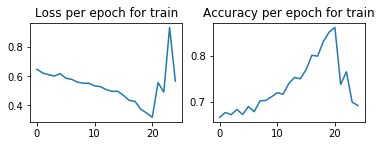

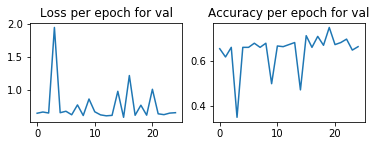

In [78]:
plot_loss_acc(loss_file="MLresults/old/4.8_loss2plot.csv",acc_file="MLresults/old/4.8_acc2plot.csv")

<font color="blue">

Above are the tracked accuracy and loss when use whole data to train and validate. 

1. I do not have a mild overfitting problem, illustrated by smaller accuracy for validation data than training data.


2. I think I have gradient explosion problem. As we can appreciate on the 1st plot where the loss dramatically increases from epoch #20. Consistenly, we see a dramtic decrease in Accuracy starting from epoch #20. Even though it did not change the performance of model for validation dataset, it still suggest starting from epoch #20, the gradiant explosion occurs.

    <font color="red"> -->in the future, I would consider a **Gradient Clip Strategy** to control this type of problem.<font>


    
<font>   

# 5. Transfer learning as a feature extractor (Total 12 points)
In this part of the HW we are interested in using transfer learning for the disease classification task. we will use ResNet34 model to achieve this goal. Here is the link for the ResNet paper: https://arxiv.org/pdf/1512.03385.pdf  There are multiple ways of achieving transfer learning from a pretrained network as we cover in Lecture 6. You will use ResNet34 model pretrained on ImageNet as a fixed feature extractor in this question.

## 5.1)
We need to make necessary changes in dataloader which is defined in Q.4.2. to make the dataset class is capable of feeding the X-ray dataset into resnet model for transfer learning. Remember X-ray data has grayscale images of 1024x1024 pixels and resnet34 model was trained on RGB images of size 256x256 from ImageNet. We provide you the new dataset class tailored for transfer learning. Answer the following questions

## 5.1.a) (1 point)
Please explain what does following lines of code would achievein the data loader?

...

transforms.Resize([256,256]),

transforms.RandomResizedCrop(224),

...

<font color="blue">
   
1.  `transforms.Resize([256,256])` resize the images by reducing the dimentions from 1024x1024 to 256x256
 
2. `transforms.RandomResizedCrop(224)` A crop of random image of size 224x224 at random aspect ratio (3/4-4/3) is made.
 
</font>

## 5.1.b) (2 points)
Why do we need different transforms for train set and validation/test sets?

<font color="blue">

For the training purpose, we want the model to learn as much as possible, or as generalized as possible. Thus it requires the model to learn under all kinds of circumastances and be inviarant to small changes. Thus at the trainig phase we introduce some randomness to the traning data by incorpratiin addtional random crop and flip. 

<font>
    

## 5.1.c) (1 point)
Please explain what does following line of code achieves in the data loader and propose alternatives.

image=np.repeat(image[None,...],3,axis=0)

<font color="blue">

This code duplicate the matrix of `image` by 3, and stack them together. The idea is Resnet34 takes RGB images, which consist of 3 channels. We need to duplicate our previous 1 chanel image into 3 channels by duplicating it three times.

Alternatively we can use `transforms.Grayscale(num_output_channels=3)` in the `transform` function.

## 5.2) (2 points)
Define train, validation and test dataloaders loaders using the dataset class defined in Q.5.1.a and .csv files: HW2_TrainSet, HW2_ValidationSet

In [79]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from skimage import io
import torch
from torchvision import transforms
import torchvision
from skimage import color

# torchvision models are trained on input images normalized to [0 1] range .ToPILImage() function achives this
# additional normalization is required see: http://pytorch.org/docs/master/torchvision/models.html

train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize([256,256]),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

validation_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize([256,256]),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

class ChestXrayDataset_TL(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])
        
        image = io.imread(img_name)
        print(image.shape)
        if len(image.shape) > 2 and image.shape[2] == 4:
            image = image[:,:,0]
            
        image=np.repeat(image[None,...],3,axis=0)
            
        image_class = self.data_frame.iloc[idx, -1]

        if self.transform:
            image = self.transform(image)
            
        sample = {'x': image, 'y': image_class}

        return sample  
    


In [ ]:
chestXray_TL_TrainData = ChestXrayDataset_TL(csv_file="HW2_trainSet.csv", root_dir="/beegfs/ga4493/data/HW2/images", transform=train_transform)
chestXray_TL_ValidationData = ChestXrayDataset_TL(df_path="HW2_validationSet.csv",image_path="/beegfs/ga4493/data/HW2/images",transform=validation_transform)


batch_size = 16
train_loader = DataLoader(chestXray_TrainData, batch_size=BATCH_SIZE,
                               shuffle=True, num_workers=4)
validation_loader = DataLoader(chestXray_ValidationData, batch_size=BATCH_SIZE,
                               shuffle=True, num_workers=4)

## 5.3) (2 points)
Write the code for designing resnet34 architecture and loading the weights from ImageNet trained network. 

In [80]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [82]:
# ----------------------------------------------
# 2. model : pretrained resNET34
# ----------------------------------------------
model_ft = models.resnet34(pretrained=False)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)


# use GPU if availaible       
use_gpu= torch.cuda.is_available() 
if use_gpu:
    model_ft.cuda()

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0005)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)


# ----------------------------------------------
# 3. train model
# ----------------------------------------------
dataset_sizes = {'train': len(chestXray_TL_TrainData), 'val': len(chestXray_TL_ValidationData)}

def train_model(model, criterion, optimizer, num_epochs=25, trainVal=['train','val'],verbose=True):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    loss2plot = np.zeros([2,num_epochs])
    acc2plot  = np.zeros([2,num_epochs])

    for epoch in range(num_epochs):
        if verbose:
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in trainVal:
            if phase == 'train':
                imageLoader = train_loader
            else:
                imageLoader = validation_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for sample_batched in imageLoader:
                # get the inputs
                inputs = sample_batched['x']
                labels = sample_batched['y']

                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs).type(torch.FloatTensor).cuda()
                    labels = Variable(labels).type(torch.LongTensor).cuda()
                else:
                    inputs, labels = Variable(inputs).type(torch.FloatTensor), Variable(labels).type(torch.LongTensor)
            

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)
                

 
                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
 
                #  statistics
                running_loss += loss.data.item() * inputs.size(0)
                running_corrects += float(torch.sum(preds == labels.data))


 
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            


            if phase == 'train':
                loss2plot[0,epoch] = epoch_loss
                acc2plot[0,epoch] = epoch_acc
            else:
                loss2plot[1,epoch] = epoch_loss
                acc2plot[1,epoch] = epoch_acc


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

            if verbose:
                print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                    phase, epoch_loss, epoch_acc))


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    np.savetxt("5.3_loss2plot2.csv",loss2plot,delimiter=",")
    np.savetxt("5.3_acc2plot2.csv",acc2plot,delimiter=",")
    
    return model



# model_ft = train_model(model_ft, criterion, optimizer_ft,num_epochs=100, trainVal=['train','val'])

# torch.save(model_ft.state_dict(), "model_5.3.pt")



## 5.4) (4 points)
Train the model for ~100 epochs and save the weights of the best model using the validation loss. Plot train and validation loss curves. Explain the learning behavior of training TL model as a feature extractor using the observations from loss/accuracy curves. 

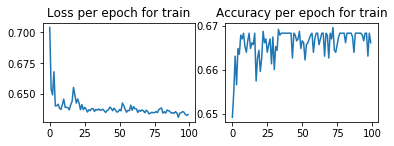

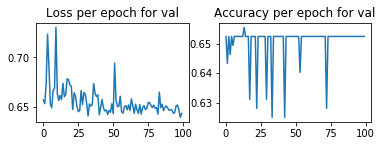

In [92]:
# model was trained on PRINCE HPC
# model_ft = train_model(model_ft, criterion, optimizer_ft,num_epochs=25, trainVal=['train','val'])

plot_loss_acc(acc_file="MLresults/5.3_acc2plot.csv",loss_file="MLresults/5.3_loss2plot.csv")

<font color="blue">

Over the 100 epochs, the train loss has been steadily decreasing, until it reaches a plato. Similarly, the trainn accuracy is slowly increasing with minor fluctuation. Those suggest that models are constantly updating. 

with the validation loss, we see similar pattern as train loss with a few spicks. However the accuracy on validation is not as ideal where it did not increase a lot, whereas has decreased spikes. those suggest the models are overfitting the training data and not very generalized on validation data.

On the other hand, with `resnet34`, which are designed to account for RGB photos, our input is not proper. Although we transform our input images to three channels, but they are exact same values with a lot of redundency. These do not fit how resnet34 is designed and need to be considered further. 

<font>

## 6) Analysis of the results from two networks trained on the full dataset (Total 8 points + max 10 points for Bonus Question)
Use the validation loss to choose models from Q4 (model1) and Q5(model2) (These models are trained on the full dataset and they learned from train data and generalized well to the validation set). 

## 6.1)  (4 Points)
Using these models, plot confusion matrix and ROC curve for the disease classifier on the test set (HW2_TestSet.csv). Report AUC for this CNN model as the performance metric. You will have two confusion matrices and two ROC curves to compare model1 and model2

In [110]:
result_Q4 = pd.read_csv("MLresults/test_4.8model.csv",header=None)
result_Q5 = pd.read_csv("MLresults/test_5.3model.csv",header=None)
temp = result_Q4.iloc[0,:]

In [121]:
sklearn.metrics.roc_curve(result_Q4.iloc[0,:].to_numpy(), result_Q4.iloc[1,:].to_numpy())

(array([0.      , 0.359447, 1.      ]),
 array([0.        , 0.85487528, 1.        ]),
 array([2., 1., 0.]))

In [127]:
# This is the place we predict the disease from a model trained, output for this function is 
#the target values and probabilty of each image having a disease 

# Example of how to plot ROC curves
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

# Example of how to calculate confusion matrix
# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

def plot_roc(y_pred,y_true,title = "ROC"):
    plt.title(title)
    fpr, tpr,_ = sklearn.metrics.roc_curve(y_pred,y_true)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

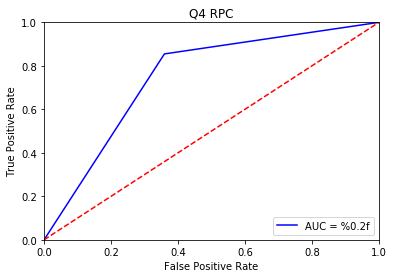

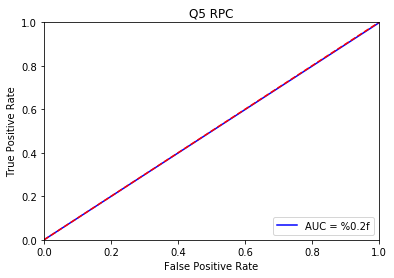

In [130]:
plot_roc(result_Q4.iloc[0,:].to_numpy(), result_Q4.iloc[1,:].to_numpy(),title="Q4 RPC")
plot_roc(result_Q5.iloc[0,:].to_numpy(), result_Q5.iloc[1,:].to_numpy(),title="Q5 RPC")

array([[139,  78],
       [ 64, 377]])

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()



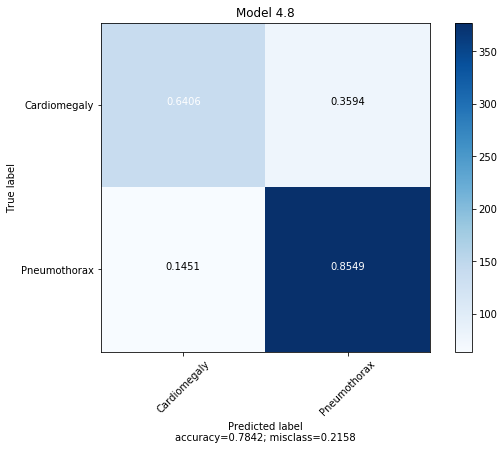

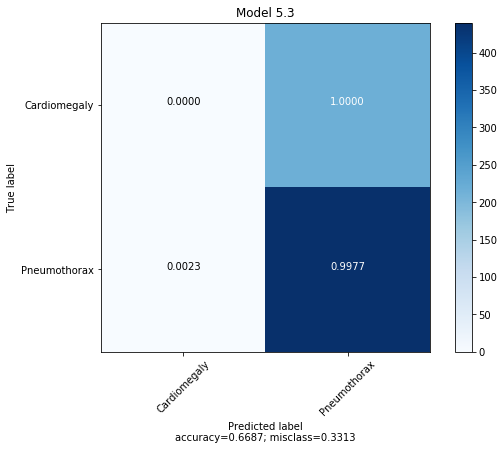

In [134]:
plot_confusion_matrix(cm           = sklearn.metrics.confusion_matrix(result_Q4.iloc[0,:].to_numpy(), result_Q4.iloc[1,:].to_numpy()), 
                      target_names = ['Cardiomegaly', 'Pneumothorax'],
                      title        = "Model 4.8")
plot_confusion_matrix(cm           = sklearn.metrics.confusion_matrix(result_Q5.iloc[0,:].to_numpy(), result_Q5.iloc[1,:].to_numpy()), 
                      target_names = ['Cardiomegaly', 'Pneumothorax'],
                      title        = "Model 5.3")
 

## 6.2) Understanding the network (4 points)
Using the best performing model (choose the model using the analysis you performed on Q6.1), we will figure out where our network gathers infomation to decide the class for the image. One way of doing this is to occlude parts of the image and run through your network. By changing the location of the ocluded region we can visualize the probability of image being in one class as a 2-dimensional heat map. Using the best performing model, provide the heat map of the following images: HW2_visualize.csv. Do the heap map and bounding box for pathologies provide similar information? Describe your findings.
Reference: https://arxiv.org/pdf/1311.2901.pdf

In [167]:
# You can use the code from: https://github.com/thesemicolonguy/convisualize_nb/blob/master/cnn-visualize.ipynb 
# with minor modifications
import scipy.misc
import json
import pdb

model = ResNet_HW2()

def to_grayscale(image):
    """
    input is (d,w,h)
    converts 3D image tensor to grayscale images corresponding to each channel
    """
    image = torch.sum(image, dim=0)
    image = torch.div(image, image.shape[0])
    return image

def normalize(image):
    normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
    preprocess = transforms.Compose([
#    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalize
    ])
    image = Variable(preprocess(image).unsqueeze(0))
    return image


def predict(image):
    _, index = model(image).data[0].max(0)
    print(model(image))
    #return str(index.item()[0]), labels[str(index.item()[0])][1]
    
def deprocess(image):
    return image * torch.Tensor([0.229, 0.224, 0.225]).cuda()  + torch.Tensor([0.485, 0.456, 0.406]).cuda()

def load_image(path):
    image = Image.open(path)
    plt.imshow(image)
    plt.title("Image loaded successfully")
    return image
def layer_outputs(image):
    outputs = []
    names = []
    for layer in modulelist[1:]:
        image = layer(image)
        outputs.append(image)
        names.append(str(layer))
        
    output_im = []
    for i in outputs:
        i = i.squeeze(0)
        temp = to_grayscale(i)
        output_im.append(temp.data.cpu().numpy())
        
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (30, 50)


    for i in range(len(output_im)):
        a = fig.add_subplot(8,4,i+1)
        imgplot = plt.imshow(output_im[i])
        plt.axis('off')
        a.set_title(names[i].partition('(')[0], fontsize=30)

    plt.savefig('layer_outputs.jpg', bbox_inches='tight')

In [148]:
model.load_state_dict(torch.load("MLresults/model_4.8.pt",map_location='cpu'))

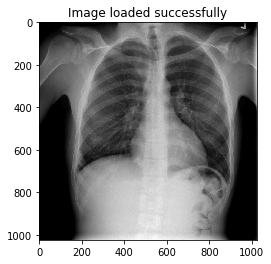

In [201]:
kitten_1 = load_image("./00018837_000.png")
#labels = json.load(open('labels/imagenet_class_index.json'))
kitten_2 = normalize(kitten_1)
#print(kitten_2.shape)
# model(kitten_2)
# print(predict(kitten_2))
#modulelist = list(["conv1","relu","maxpool","resnet1","conv2","relu","maxpool","resnet2","FC"])
#layer_outputs(kitten_2)

In [198]:
def make_heatmap(image, true_class, k=3, stride=2): 
    """
    Input image is of size (1, c, w, h) typically (1, 3, 224, 224) for vgg16
    true_class is a number corresponding to imagenet classes
    k in the filter size (c, k, k)
    """
    heatmap = torch.zeros(int(((image.shape[2]-k)/stride)+1), int(((image.shape[3]-k)/stride)+1))
    image = image.data

    i = 0
    a = 0
    while i<=image.shape[3]-k:
        j = 0 
        b = 0
        while j<=image.shape[2]-k:
            h_filter = torch.ones(image.shape)
            h_filter[:,:,j:j+k, i:i+k] = 0
            temp_image = Variable((image * h_filter))
            temp_softmax = model(temp_image)
            temp_softmax = torch.nn.functional.softmax(temp_softmax).data[0]
            heatmap[a][b] = temp_softmax[true_class]
            j += stride
            b += 1
        print(a)
        i += stride
        a += 1
    
    image = image.squeeze()
    
    true_image = image.transpose(0,1)
    true_image = true_image.transpose(1,2)
    # Un-Normalize image
    true_image = true_image * torch.Tensor([0.229, 0.224, 0.225]).cuda()  + torch.Tensor([0.485, 0.456, 0.406]).cuda()
    
    # Plot both images
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (20, 20)
    
    a = fig.add_subplot(1,2,1)
    imgplot = plt.imshow(true_image)
    plt.title('Original Image')
    plt.axis('off') 
    
    # Normalize heatmap
    heatmap = heatmap - heatmap.min()
#     heatmap = heatmap/heatmap.max()
    heatmap = np.uint8(255 * heatmap)
    
    a = fig.add_subplot(1,2,2)
    imgplot = plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off') 
    
    return heatmap


tensor(0)
tensor([[-0.0711, -0.1307]], grad_fn=<AddmmBackward>)


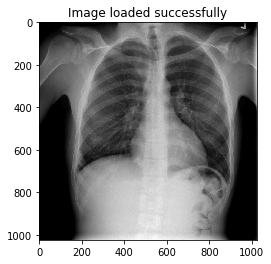

In [203]:
kitten_1 = load_image("./00018837_000.png")
#labels = json.load(open('labels/imagenet_class_index.json'))
kitten_2 = normalize(kitten_1)
predict(kitten_2)
#make_heatmap(kitten_2, 0, k=3, stride=2)


In [213]:
def make_saliency_map(input, label):
    input = Variable(input, requires_grad=True)
    output = model.forward(input)
    output[0][label].backward()
    grads = input.grad.data.clamp(min=0)
    grads.squeeze_()
#     grads.transpose_(0,1)
#     grads.transpose_(1,2)
    grads = np.amax(grads.cpu().numpy(), axis=2)
    
    true_image = input.data
    true_image = true_image.squeeze()
#     true_image = true_image.transpose(0,1)
#     true_image = true_image.transpose(1,2)
    true_image = deprocess(true_image)

    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (20, 20)


    a = fig.add_subplot(1,2,1)
    imgplot = plt.imshow(true_image)
    plt.title('Original Image')
    plt.axis('off') 

    a = fig.add_subplot(1,2,2)
    imgplot = plt.imshow(grads)
    plt.axis('off') 
    plt.title('Saliency Map')
    
    return grads

In [215]:
#make_saliency_map(kitten_2,0)

## 6.3 ) Your CNN architecture design (Bonus Question Maximum 12 Points)
Be creative and design your own CNN model. This model can be some variation of the baseline model using the information from hyperparameter search or it can be a totally new architecture. Use the knowledge you gained from previous questions to design your network. Because of this reason, your network is expected to provide superior results. After you trained your network on the whole train set, choose the best performaing model using the loss on the whole validation set. Provide the confusion matrix, ROC curves and macro AUC for your best performing model using the whole test set. Explain your design criteria and why your performance is better compared to the baseline model. Some architecture change suggestions: convolution filter dimensions, dilated convolutions, network without a fully connected layer, deeper networks, data augmentation ...     

<font color="blue">

My strategy is to add a batch normalization layer after relu. 

My rationale is after relu, the net work weights will be some times sparse with lots of 0. In this way, it will not  be very efficient for evaluate the updates on covolutional filters. Because essentially the updated weights multiply by 0 is still 0. 

To cope with this issue, I consider use either a leaky relu or batch normalization. 
    
<font>    

In [ ]:
class ResNet_HW2_Q6(nn.Module):

    def __init__(self, num_classes=2):
        super(ResNet_HW2, self).__init__()
        self.inplanes = 64
        self.normalize = nn.BatchNorm2d()
        self.conv1 = conv3x3(1,16,stride=2)
        self.conv2 = conv3x3(16,32,stride=2)
        self.layer1 = BasicBlock(16, 16, stride=1, downsample=None, norm_layer=None)
        self.layer2 = BasicBlock(32, 32, stride=1, downsample=None, norm_layer=None)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(131072 , 64)
        self.classify = nn.Linear(64, num_classes)


    def forward(self, x):

        x = self.conv1(x)
        x = self.relu(x)
        x = self.normalize(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.normalize(x)
        x = self.maxpool(x)
        
        x = self.layer2(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        
        x = self.classify(x)
        
        return x

<font color="blue">
    


<font>

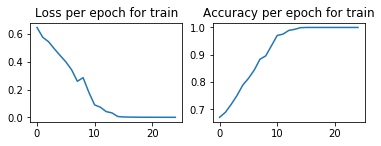

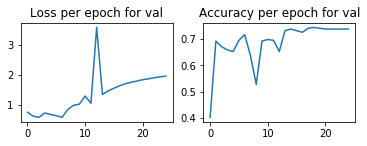